In [1]:
import numpy as np
from tqdm import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt
from scipy.stats import zscore, mannwhitneyu
import h5py
import glob

plt.style.use('fivethirtyeight')
def clean_axis(ax):
    ax.xaxis.set_tick_params(labelsize=11)
    ax.yaxis.set_tick_params(labelsize=11)
    for i in ['top', 'bottom', 'left', 'right']:
        ax.spines[i].set_visible(False)
    ax.grid(which='major', linestyle='--', alpha=0.7)
    return True

In [2]:
chroms = ['chr'+str(x) for x in range(1,23)] + ['chrX', 'chrY']
chrom_info = [x.rstrip('\n').split('\t') for x in 
              open('/home/parashar/scratch/hg19_resource/hg19.genome').readlines()]
chrom_info = {x[0]: int(x[1]) for x in chrom_info}

In [17]:
chrom = 'chr10'
scores = np.load('../data/sniprq_scores/chr10_positive.npy')

In [43]:
shape = np.array(h5py.File(
        '../data/dna_shape/hdf5_files/chr10_Roll.h5')['shape']['Roll'])[:, 0]

In [44]:
scores.shape, shape.shape

((135534747,), (135534746,))

In [45]:
idx = np.where((scores < 5) & (scores > 0))[0]
shape_low = shape[idx]
shape_low = shape_low[~np.isnan(shape_low)]
print (idx.shape, sum(shape_low))

(2364814,) -4551535.13001


In [46]:
idx = np.where(scores > 200)[0]
shape_hi = shape[idx]
shape_hi = shape_hi[~np.isnan(shape_hi)]
print (idx.shape, sum(shape_hi))

(263049,) -507827.83


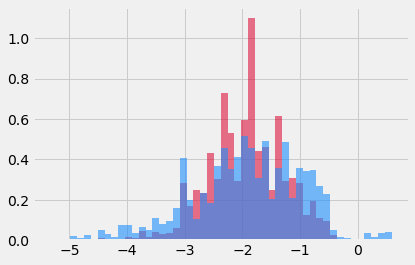

In [47]:
plt.hist(shape_hi, bins=50, alpha=0.6, color='crimson', normed=True)
plt.hist(shape_low, bins=50, alpha=0.6, color='dodgerblue', normed=True)
plt.show()

In [154]:
np.mean(shape_hi), np.mean(shape_low)

(33.895409582017969, 34.244876626965514)

In [156]:
mannwhitneyu(shape_hi, shape_low)

MannwhitneyuResult(statistic=885368663406.5, pvalue=0.0)